백색잡음(noise) : 시간에 따라 독립적인 데이터. 시간에 영향을 받지 않는 

In [1]:
## 데이터 불러오기
import pandas as pd

data = pd.read_csv('data/electricity.csv')
data

,Residential,Commercial,Industrial,Total,dates
0,3078100.0,2016100.0,2425400.0,7770200.0,1990-01-01
1,2660700.0,2032600.0,2664500.0,7620100.0,1990-02-01
2,2319400.0,1870300.0,2478800.0,6905400.0,1990-03-01
3,2173000.0,1882700.0,2541300.0,6835700.0,1990-04-01
4,2028400.0,1901300.0,2540600.0,6714600.0,1990-05-01
...,...,...,...,...,...
310,3079400.0,3464700.0,2545900.0,9110300.0,2015-11-01
311,3581700.0,3429430.0,2449100.0,9480300.0,2015-12-01
312,4219200.0,3559200.0,2460900.0,10260000.0,2016-01-01
313,3997000.0,3563400.0,2561800.0,10145000.0,2016-02-01


### 전기 사용량인 total 변수와 날짜인 dates 변수만 사용할 것.
### 데이터 정리해주자.

In [3]:
df = data[['dates', 'Total']] #dates와 total만 df에 담기

df = df.rename(columns={
    "Total" : "total"
}) # Total 변수이름 변경

df

,dates,total
0,1990-01-01,7770200.0
1,1990-02-01,7620100.0
2,1990-03-01,6905400.0
3,1990-04-01,6835700.0
4,1990-05-01,6714600.0
...,...,...
310,2015-11-01,9110300.0
311,2015-12-01,9480300.0
312,2016-01-01,10260000.0
313,2016-02-01,10145000.0


In [4]:
df.info() #type 및 null 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dates   315 non-null    object 
 1   total   306 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.0+ KB


### total에 null이 존재함. null이 어디있는지 확인해보자.

In [5]:
df[df['total'].isnull()]

,dates,total
26,1992-03-01,NaN
76,1996-05-01,NaN
172,2004-05-01,NaN
175,2004-08-01,NaN
210,2007-07-01,NaN
221,2008-06-01,NaN
256,2011-05-01,NaN
272,2012-09-01,NaN
273,2012-10-01,NaN


### 군데군데 null이 있음.. 
### 그래서 최대한 이어지는 부분인 1997-2003 데이터를 사용하여 분석을 할 것임. 
### 나아가 null이 존재하는 연도의 값을 예측할 수 있다면 너무 기쁠것..

### 일단 전체 데이터 모양을 보고 전체 데이터가 어떤 특성의 시계열인지 확인해보자.

In [6]:
df['dates'] = pd.to_datetime(df['dates']) #dates 변수 타입 변경
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   dates   315 non-null    datetime64[ns]
 1   total   306 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.0 KB


<AxesSubplot:xlabel='dates'>

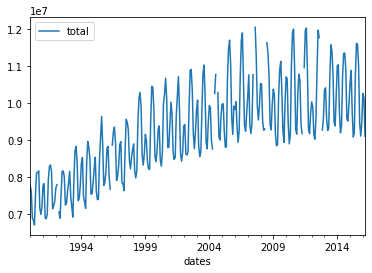

In [35]:
df_all = df[['total']]

df_all.plot()

### 전체 그래프 보면 중간에 null 때문에 끊긴것도 보이고 
### 상승하는 추세성도 보이고, 분산이 일정하지 않고 조금씩 증가하는 것 같기도 하다. 

In [38]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

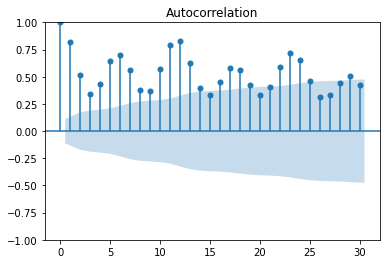

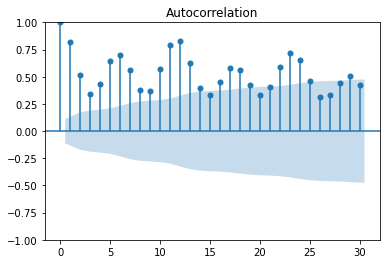

In [51]:
df_all_null = df_all.dropna(axis=0) # NAN때문에 plot이 안된다. 
# df_all_null.info()
plot_acf(df_all_null['total'], lags=30, alpha=0.05)

### 중간에 null을 제거해서 그 부분에서 acf가 확 줄어드는걸까?
### 대부분 자기상관이 0이 아닌것 같다.. 

### null이 없는 1997-2003 데이터만 확인해보자

In [30]:
df['year'] = df['dates'].dt.year # dates 파생변수 year 생성
df

,dates,total,year
dates,,,
1990-01-01,1990-01-01,7770200.0,1990
1990-02-01,1990-02-01,7620100.0,1990
1990-03-01,1990-03-01,6905400.0,1990
1990-04-01,1990-04-01,6835700.0,1990
1990-05-01,1990-05-01,6714600.0,1990
...,...,...,...
2015-11-01,2015-11-01,9110300.0,2015
2015-12-01,2015-12-01,9480300.0,2015
2016-01-01,2016-01-01,10260000.0,2016


In [31]:
df9703 = df.query('year >= 1997 & year <= 2003') # 1997-2003 데이터 추출
df9703

,dates,total,year
dates,,,
1997-01-01,1997-01-01,8882200.0,1997
1997-02-01,1997-02-01,8959500.0,1997
1997-03-01,1997-03-01,7854700.0,1997
1997-04-01,1997-04-01,7826900.0,1997
1997-05-01,1997-05-01,7636900.0,1997
...,...,...,...
2003-08-01,2003-08-01,11026000.0,2003
2003-09-01,2003-09-01,10220000.0,2003
2003-10-01,2003-10-01,8947700.0,2003


In [32]:
df9703 = df9703[['total']]
df9703

,total
dates,
1997-01-01,8882200.0
1997-02-01,8959500.0
1997-03-01,7854700.0
1997-04-01,7826900.0
1997-05-01,7636900.0
...,...
2003-08-01,11026000.0
2003-09-01,10220000.0
2003-10-01,8947700.0


<AxesSubplot:xlabel='dates'>

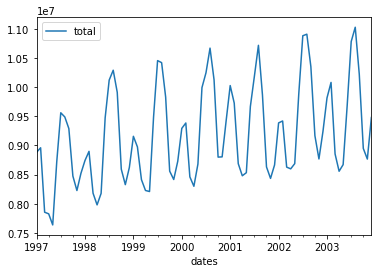

In [34]:
df9703.plot()

In [65]:
df9703.describe()

,total
count,8.400000e+01
mean,9.192832e+06
std,8.231750e+05
min,7.636900e+06
25%,8.584125e+06
50%,8.953600e+06
75%,9.837350e+06
max,1.102600e+07


### 이 구간도 약간 상승 경향을 보이는 것 같고, 계절성을 보이는 것 같다. 
### 이전 데이터가 현재 데이터에 영향을 주는지 확인해보자

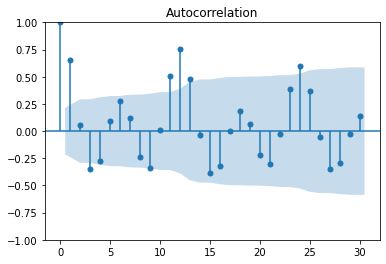

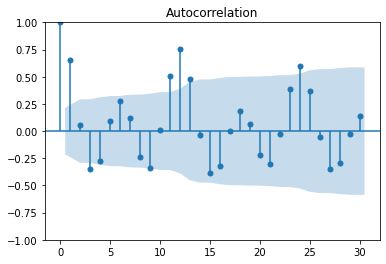

In [52]:
plot_acf(df9703['total'], lags=30, alpha=0.05)

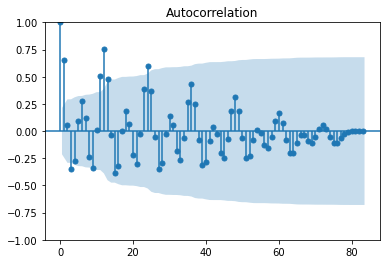

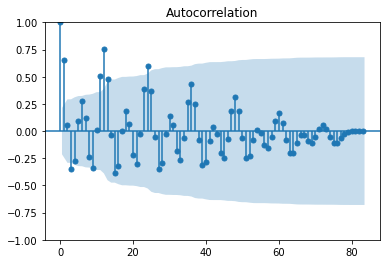

In [45]:
plot_acf(df9703['total'], lags=83, alpha=0.05) # lags 최대로

### 어떻게 모양이 이렇게 생긴거지
### 그래도 대표적 정상성 데이터인 백색잡음의 ACF와 비교하면 비정상성 같은 느낌이다.
### 정상성을 통계적으로 확인하기 위해 ADF 검정도 해보자

In [68]:
from statsmodels.tsa.stattools import adfuller

In [70]:
def adf_test(x):
    stat, p_value, lags, nobs, crit, icb = adfuller(x)
    
    return p_value

print('pvalue =', adf_test(df9703))

pvalue = 0.26996723464907924


### Pvalue가 0.2다. 0.05보다 크므로 정상성 데이터라 할 수 없다.

https://syj9700.tistory.com/30
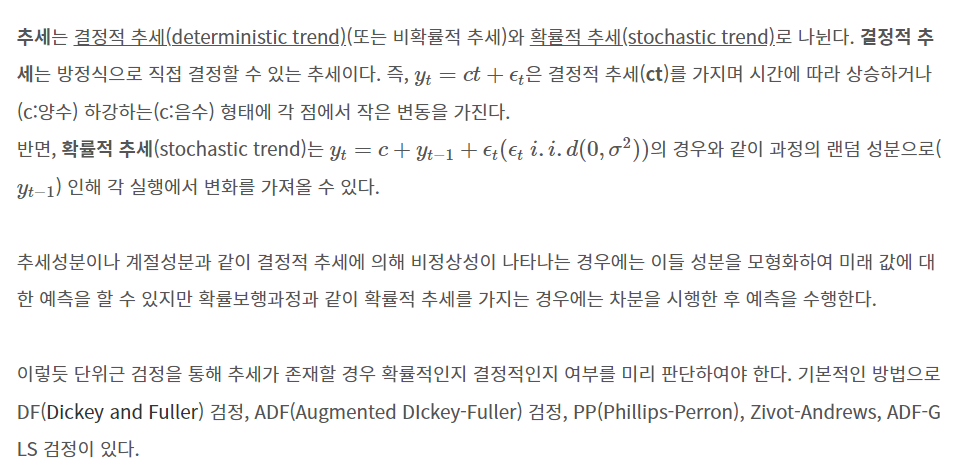

### 정상성 변환을 할건데 이게 분산이 증가하는건지 잘 모르겠다. 어떻게 확인해야할까
### 일단 분산을 일정하게 만들기 위해 로그를, 추세를 제거하기 위해 1차 차분을 해보자

## 로그 안하고 adf 검증 해보기

In [57]:
import numpy as np

In [61]:
df9703_tf = np.log(df9703).diff().diff(12) #로그 및 챠분(주기:12개월)
df9703_tf.info()
df9703_tf

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 84 entries, 1997-01-01 to 2003-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   total   71 non-null     float64
dtypes: float64(1)
memory usage: 1.3 KB


,total
dates,
1997-01-01,NaN
1997-02-01,NaN
1997-03-01,NaN
1997-04-01,NaN
1997-05-01,NaN
...,...
2003-08-01,0.019992
2003-09-01,-0.023491
2003-10-01,-0.011577


### 차분을 진행할 때는 두 값을 빼주게 됩니다. 그렇기에 차분을 진행할 때마다 데이터의 길이가 짧아지게 되어, 짧아진 부분에 공백이 생깁니다. 이 공백을 지워주지 않으면 ADF 검정 과정에서 오류가 발생할 수 있습니다.

https://modulabs.co.kr/blog/time-series-stationarity/

In [62]:
df9703_tf = df9703_tf.dropna() #공백 제거

<AxesSubplot:xlabel='dates'>

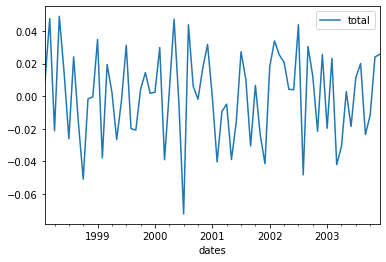

In [63]:
df9703_tf.plot()

### 추세가 제거된 건 확실히 보임

In [64]:
df9703_tf.describe()

,total
count,71.000000
mean,0.000584
std,0.027085
min,-0.072113
25%,-0.020339
50%,0.002821
75%,0.021940
max,0.048960


### 평균이 0에 가까워짐
### adf 검정도 해보자

In [69]:
print('pvalue =', adf_test(df9703_tf))

pvalue = 1.651583988260522e-12


### pvalue도 0.05아래로 나왔다. 
### df9703_tf는 정상성데이터라고 할 수 있다. acf와 pacf를 통해 한 번 더 확인하자

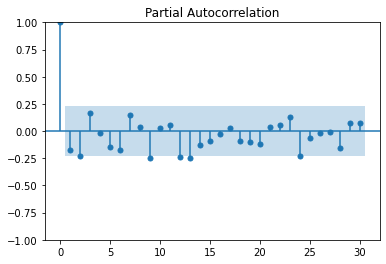

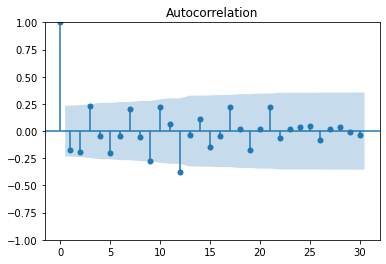

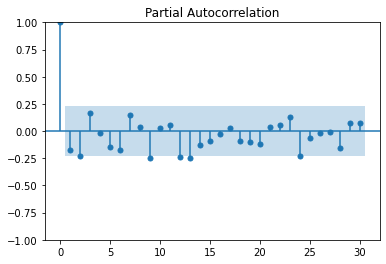

In [118]:
plot_acf(df9703_tf, lags=30, alpha=0.05)
plot_pacf(df9703_tf, lags=30, alpha=0.05, method = 'ywm')

### 예측모델 생성
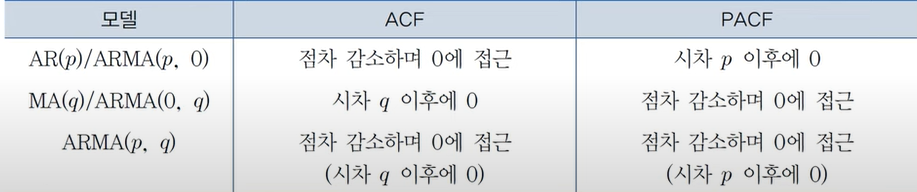

### AR(1)/ARMA(1,0), MA(1)/ARMA(0,1), ARMA(1, 1)을 사용해야 할 것 같다.

In [86]:
from statsmodels.tsa import stattools
from statsmodels.tsa.arima.model import ARIMA
# from statsmodels.tsa.arima_model import ARIMA

In [112]:
df9703_arima = ARIMA(df9703, order=(0, 1, 0)) #차분되지 않은 원본데이터 입력

df9703_fit = df9703_arima.fit()

print(df9703_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  total   No. Observations:                   84
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1232.491
Date:                Sat, 04 Feb 2023   AIC                           2466.981
Time:                        00:21:49   BIC                           2469.400
Sample:                    01-01-1997   HQIC                          2467.953
                         - 12-01-2003                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.573e+11   8.22e+10      5.563      0.000    2.96e+11    6.18e+11
Ljung-Box (L1) (Q):                  12.50   Jarque-Bera (JB):                 1.22
Prob(Q):                              0.00   Pr

C:\Users\mirae\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mirae\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mirae\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [113]:
df9703_arima2 = ARIMA(df9703, order=(1, 1, 1)) #차분되지 않은 원본데이터 입력

df9703_fit = df9703_arima2.fit()

print(df9703_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  total   No. Observations:                   84
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1227.326
Date:                Sat, 04 Feb 2023   AIC                           2460.652
Time:                        00:23:07   BIC                           2467.909
Sample:                    01-01-1997   HQIC                          2463.568
                         - 12-01-2003                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4772      0.145     -3.293      0.001      -0.761      -0.193
ma.L1          0.7002      0.157      4.469      0.000       0.393       1.007
sigma2      3.896e+11   1.66e-13   2.34e+24      0.0

C:\Users\mirae\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mirae\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mirae\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [108]:
df9703_arima.plot()

AttributeError: 'ARIMA' object has no attribute 'plot'

"\nplt.plot(y_predict, label='Prediction')  # 예측 데이터\nplt.legend()\nplt.show()"

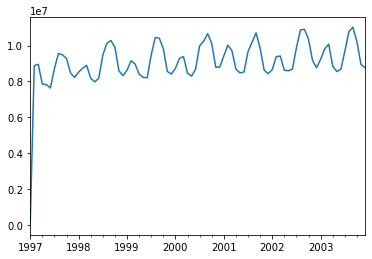

In [104]:
# 예측 https://aboutnlp.tistory.com/m/56
y_predict = df9703_fit.predict(n_periods=3) 
# y_predict = pd.DataFrame(y_predict,index = df.index,columns=['total'])

# 그래프
# fig, axes = plt.subplots(figsize=(12, 4))

y_predict.plot()
'''
plt.plot(y_predict, label='Prediction')  # 예측 데이터
plt.legend()
plt.show()'''

In [105]:
df9703_arima.predict()

TypeError: predict() missing 1 required positional argument: 'params'

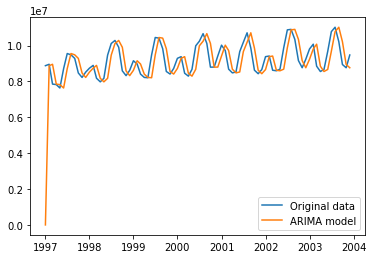

In [110]:
import matplotlib.pyplot as plt

y_predict = df9703_fit.predict(start=df9703.index[0],end=df9703.index[-1], typ='levels')

plt.plot(df9703, label='Original data')
plt.plot(y_predict, label='ARIMA model')

plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

y_predict = df9703_fit.predict(start=df9703.index[0],end=df9703.index[-1], typ='levels')

plt.plot(df9703, label='Original data')
plt.plot(y_predict, label='ARIMA model')

plt.legend()
plt.show()